In [1]:
%load_ext autoreload
%autoreload 2

In [36]:
import torch
from torch import nn
from pathlib import Path
import matplotlib.pyplot as plt
from torch.utils.data import TensorDataset, DataLoader
from lib.modules import (
    evaluate_loop, 
    read_and_window_session,
    read_session,
    read_labels,
    train_loop,
    optimization_loop,
    predict_and_plot_pretty_session
)
from lib.utils import (
    plot_and_save_cm,
    summary,
    get_bouts,
    get_bouts_smoothed
)
from lib.models import ResNetClassifier, MLP2hl
from tqdm import tqdm
import plotly.express as px
from tabulate import tabulate
import numpy as np
import pandas as pd

In [25]:
raw_dir = Path("/home/mmazeem/datasets/nursingv1")
label_dir = Path("/home/mmazeem/datasets/eating_labels")
WINSIZE = 505
DEVICE = 'cuda'

In [26]:
train_sessions = [25, 67, 42]
test_sessions = [58, 62]

Xs = []
ys = []

for session_idx in train_sessions:
    X,y = read_and_window_session(session_idx, WINSIZE, raw_dir, label_dir)

    Xs.append(X)
    ys.append(y)

Xtr = torch.cat(Xs)
ytr = torch.cat(ys)

Xs = []
ys = []

for session_idx in test_sessions:
    X,y = read_and_window_session(session_idx, WINSIZE, raw_dir, label_dir)

    Xs.append(X)
    ys.append(y)

Xte = torch.cat(Xs)
yte = torch.cat(ys)

In [47]:
model = ResNetClassifier(in_channels=3, winsize=WINSIZE).to(DEVICE)
# model = MLP2hl((10,10), WINSIZE).to(DEVICE)
optimizer = torch.optim.Adam(model.parameters(), lr=3e-4)
criterion = nn.BCEWithLogitsLoss()

In [42]:
trainloader = DataLoader(TensorDataset(Xtr, ytr), batch_size=64, shuffle=True)
testloader = DataLoader(TensorDataset(Xte,yte), batch_size=64)

optimization_loop(model, trainloader, testloader, criterion, optimizer, 10, DEVICE, Path('dev/mlp2hl'))

Epoch 9: Train Loss: 0.23999: Dev Loss: 0.72638: 100%|██████████| 10/10 [03:29<00:00, 20.96s/it]


In [48]:
# model.load_state_dict(torch.load(Path('dev/mlp2hl/best_model.pt')))
model.load_state_dict(torch.load(Path('dev/resnet/best_model.pt')))

<All keys matched successfully>

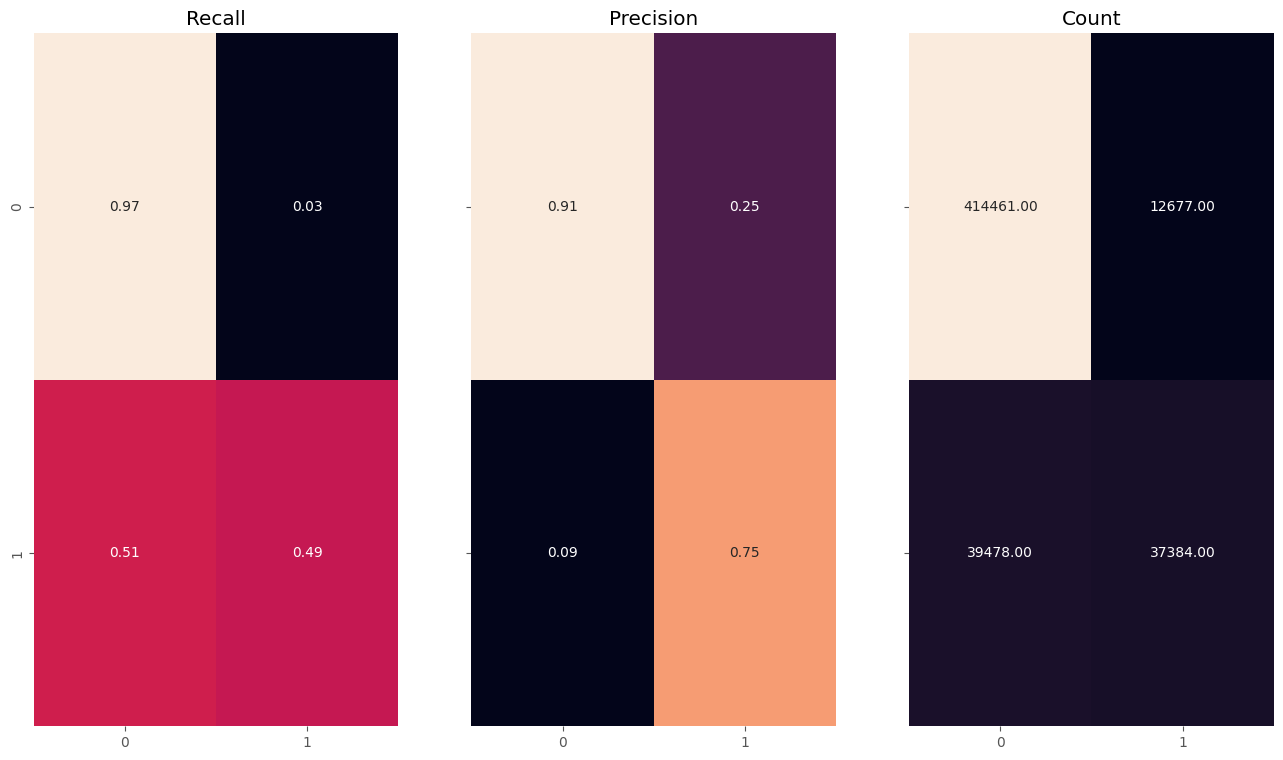

Metric        Value
---------  --------
loss       0.270148
precision  0.746769
recall     0.486378
f1         0.589082


In [49]:
ys,metrics = evaluate_loop(model, criterion, trainloader, DEVICE)
plot_and_save_cm(ys['true'], ys['pred'])
summary(metrics)

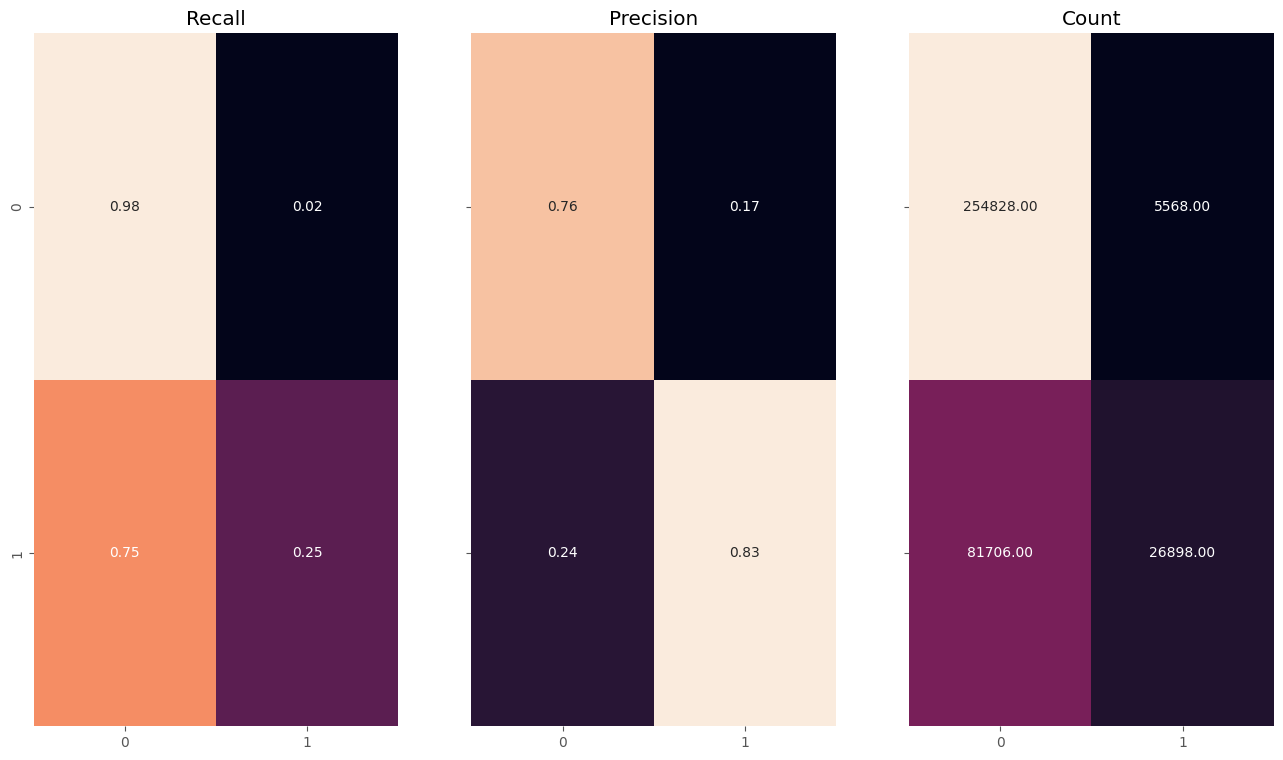

Metric        Value
---------  --------
loss       0.543635
precision  0.828498
recall     0.24767
f1         0.381343


In [50]:
ys,metrics = evaluate_loop(model, criterion, testloader, DEVICE)
plot_and_save_cm(ys['true'], ys['pred'])
summary(metrics)

In [52]:
test_session = test_sessions[1]

predict_and_plot_pretty_session(
    session_idx=test_session,
    dim_factor=5,
    datapath=raw_dir,
    labelpath=label_dir,
    winsize=WINSIZE,
    model=model,
    criterion=criterion,
    batch_size=64,
    device=DEVICE
)

Metric        Value
---------  --------
loss       0.599026
precision  0.843698
recall     0.36967
f1         0.51409


Gtk-Message: 20:28:11.953: Failed to load module "xapp-gtk3-module"
Gtk-Message: 20:28:11.954: Not loading module "atk-bridge": The functionality is provided by GTK natively. Please try to not load it.
Gtk-Message: 20:28:11.954: Failed to load module "appmenu-gtk-module"

(brave:39801): Gtk-WARNING **: 20:28:12.042: GTK+ module /snap/brave/297/gnome-platform/usr/lib/gtk-2.0/modules/libcanberra-gtk-module.so cannot be loaded.
GTK+ 2.x symbols detected. Using GTK+ 2.x and GTK+ 3 in the same process is not supported.
Gtk-Message: 20:28:12.042: Failed to load module "canberra-gtk-module"

(brave:39801): Gtk-WARNING **: 20:28:12.043: GTK+ module /snap/brave/297/gnome-platform/usr/lib/gtk-2.0/modules/libcanberra-gtk-module.so cannot be loaded.
GTK+ 2.x symbols detected. Using GTK+ 2.x and GTK+ 3 in the same process is not supported.
Gtk-Message: 20:28:12.043: Failed to load module "canberra-gtk-module"


Opening in existing browser session.
